In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
archetype_num = 23
genes_num = 16460

In [3]:
f = open("../gene_exp_k=80.txt")
data = f.readlines()
f.close()

In [4]:
clean_data = np.zeros((archetype_num, genes_num))
for i in range(1, genes_num+1):
    tmp = data[i].replace('\n','').split(" ")
    for j in range(1, archetype_num+1):
        clean_data[j-1][i-1] = float(tmp[j])

In [5]:
df = pd.DataFrame(clean_data.T) 

In [6]:
corrM = df.corr() 
 
corrM 

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.000000,0.973561,0.989383,0.991931,0.985399,0.988210,0.988382,0.989763,0.993906,0.995552,...,0.977515,0.982679,0.989911,0.976550,0.986423,0.995162,0.985988,0.984305,0.969066,0.986018
1,0.973561,1.000000,0.993045,0.969555,0.992321,0.980371,0.992174,0.989430,0.989494,0.985756,...,0.991379,0.994281,0.993419,0.996791,0.993910,0.980738,0.994769,0.996325,0.990761,0.994389
2,0.989383,0.993045,1.000000,0.985035,0.997753,0.993542,0.992613,0.996798,0.994287,0.994715,...,0.988384,0.997801,0.998006,0.993292,0.997154,0.993225,0.994803,0.997303,0.986617,0.995496
3,0.991931,0.969555,0.985035,1.000000,0.979756,0.992842,0.980017,0.989906,0.985152,0.985379,...,0.977433,0.983394,0.986663,0.969545,0.984611,0.996098,0.983549,0.980011,0.978044,0.979337
4,0.985399,0.992321,0.997753,0.979756,1.000000,0.992225,0.988881,0.996827,0.991073,0.994947,...,0.984985,0.995417,0.996602,0.993410,0.996702,0.987495,0.992883,0.995488,0.980851,0.994258
5,0.988210,0.980371,0.993542,0.992842,0.992225,1.000000,0.980026,0.994895,0.985716,0.989387,...,0.977936,0.993963,0.993773,0.979135,0.993229,0.994555,0.989025,0.987419,0.982477,0.983990
6,0.988382,0.992174,0.992613,0.980017,0.988881,0.980026,1.000000,0.990393,0.996559,0.993163,...,0.994187,0.988864,0.992993,0.994449,0.990662,0.988647,0.994143,0.994469,0.984747,0.997563
7,0.989763,0.989430,0.996798,0.989906,0.996827,0.994895,0.990393,1.000000,0.991897,0.994727,...,0.989859,0.994640,0.996610,0.990794,0.995282,0.992398,0.993467,0.994774,0.985012,0.993945
8,0.993906,0.989494,0.994287,0.985152,0.991073,0.985716,0.996559,0.991897,1.000000,0.996388,...,0.986964,0.989977,0.995431,0.989166,0.994195,0.993153,0.994429,0.994241,0.980766,0.994664
9,0.995552,0.985756,0.994715,0.985379,0.994947,0.989387,0.993163,0.994727,0.996388,1.000000,...,0.983901,0.989395,0.995237,0.988823,0.993640,0.991667,0.992711,0.991486,0.974590,0.993955


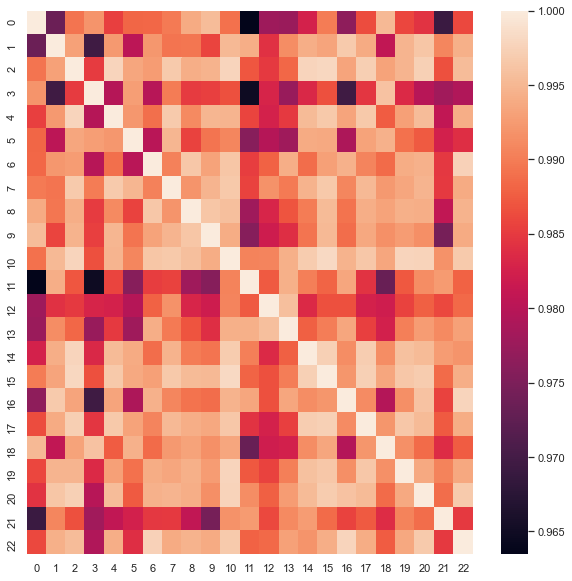

In [7]:
sns.set(rc={'figure.figsize':(10, 10)})
pic = sns.heatmap(corrM, xticklabels=corrM.columns, yticklabels=corrM.columns)
pic.get_figure() .savefig("Correlation.png")

# Top 300 genes

In [8]:
print(clean_data.shape)

(23, 16460)


In [9]:
top_gene_num = 300

In [10]:
top_gene_idx = []
for i in range(archetype_num):
    tmp = np.sort(clean_data[i])
    tmp = tmp[::-1]
    threshold = tmp[top_gene_num]
    each_row = []
    for j in range(genes_num):      
        if clean_data[i][j] > threshold:
            each_row.append(j)
    top_gene_idx.append(each_row)

In [11]:
top_gene_idx = np.array(top_gene_idx)
top_gene_idx.shape

(23, 300)

In [13]:
top_gene_matrix = np.zeros((archetype_num, archetype_num ))

In [14]:
for i in range(archetype_num):
    for j in range(archetype_num):
        top_gene_matrix[i][j] = len(list(set(top_gene_idx[i]).intersection(top_gene_idx[j])))
        

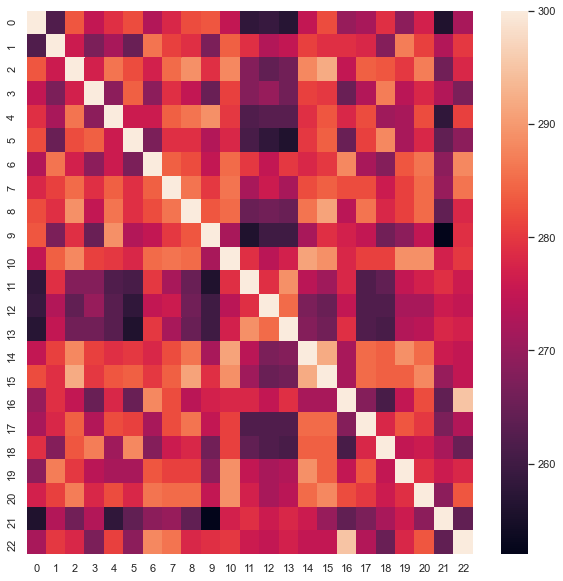

In [15]:
sns.set(rc={'figure.figsize':(10, 10)})
pic = sns.heatmap(top_gene_matrix)
pic.get_figure() .savefig("Top_gene.png")